# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/aileen/Downloads/Mouse_metadata.csv"
study_results_path = "/Users/aileen/Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = len(merge_df["Mouse ID"].unique())
mice_count

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df.drop_duplicates(subset= ["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
check = len(clean_df["Mouse ID"].unique())
check

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean

median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median

variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance

stdev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stdev

sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                               "Standard Deviation": stdev , "SEM": sem})
summary_stats


/var/folders/kb/s9xqxngx3dv_z1fd45ssqlfw0000gn/T/ipykernel_24839/3147699408.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
/var/folders/kb/s9xqxngx3dv_z1fd45ssqlfw0000gn/T/ipykernel_24839/3147699408.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
/var/folders/kb/s9xqxngx3dv_z1fd45ssqlfw0000gn/T/ipykernel_24839/3147699408.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will defau

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_v2 = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stats_v2 = summary_stats_v2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
    "std": "Standard Deviation", "sem": "SEM"})
summary_stats_v2

/var/folders/kb/s9xqxngx3dv_z1fd45ssqlfw0000gn/T/ipykernel_24839/686033724.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_v2 = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

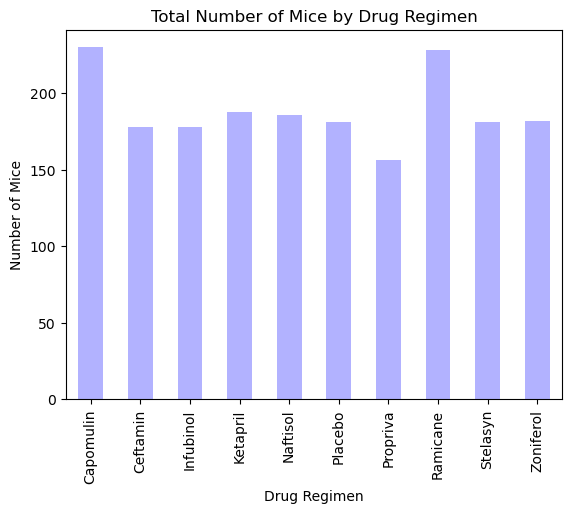

<Figure size 640x480 with 0 Axes>

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_by_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_plot = mice_by_drug.plot(kind="bar", color='blue', alpha = 0.3)
plt.title("Total Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

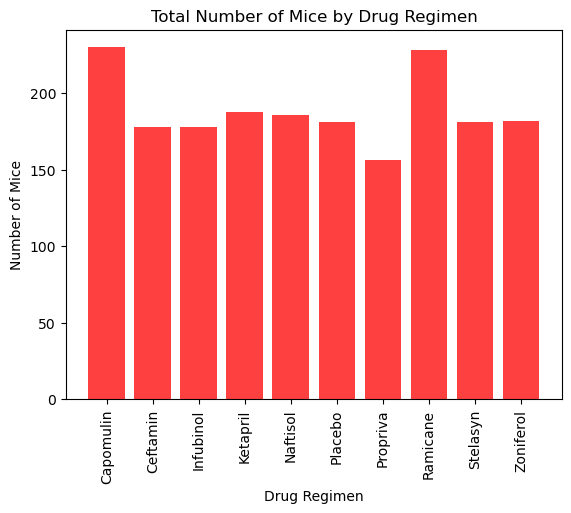

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len (mice_by_drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Total Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, mice_by_drug, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, mice_by_drug.index.values, rotation = "vertical")
plt.show()

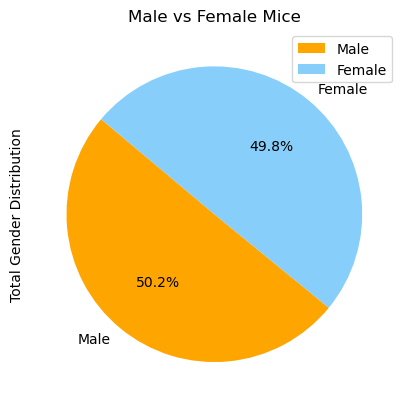

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#getting gender counts by unique mouse
mice_gender = clean_df.loc[:, ["Sex", "Mouse ID"]]
mice_gender = mice_gender.drop_duplicates()
gender_count = mice_gender["Sex"].value_counts()

#creating gender df
gender_df = pd.DataFrame({"Total Gender Distribution":gender_count})

#changing color
colors = ["orange", "lightskyblue"]

#creating pie chart
pandas_pie = gender_df.plot(kind="pie", colors=colors, title="Male vs Female Mice",
                              startangle=140, autopct="%1.1f%%")

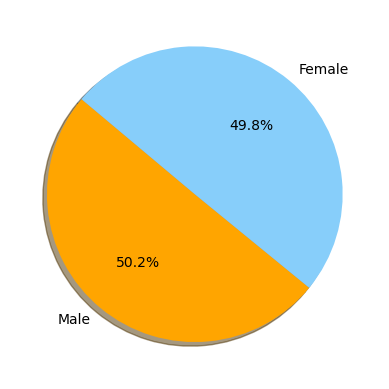

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male" , "Female"]

plt.pie(gender_count, labels= labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
timepoint = timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint = timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"])
merged_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [121]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_df = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_volume = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset 

    tumor_df.append(tumor_volume)
    print(tumor_df)

    # Determine outliers using upper and lower bounds

    #quartiles
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #outliers by lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64]
[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978

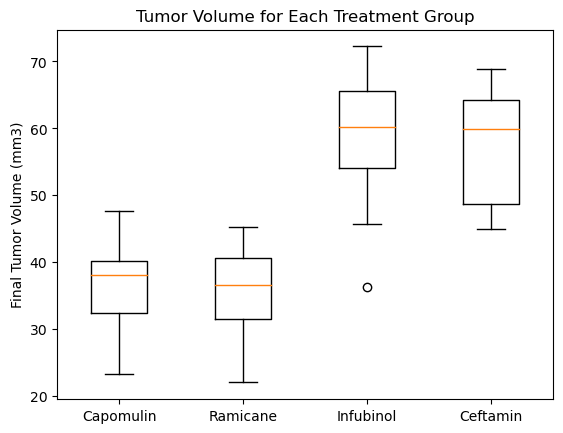

In [122]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_df, labels = treatments)
plt.show()

## Line and Scatter Plots

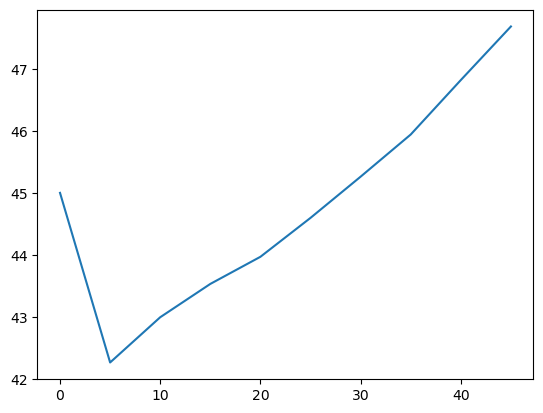

In [132]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

#single mouse

mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557",:]
mouse_df

#x values
x_axis_data = mouse_df["Timepoint"]
x_axis_data

#y values
y = mouse_df["Tumor Volume (mm3)"]

#line graph
plt.plot(x_axis_data, y)
plt.show()

/var/folders/kb/s9xqxngx3dv_z1fd45ssqlfw0000gn/T/ipykernel_18015/2386944778.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = capomulin_df.groupby(['Mouse ID']).mean()


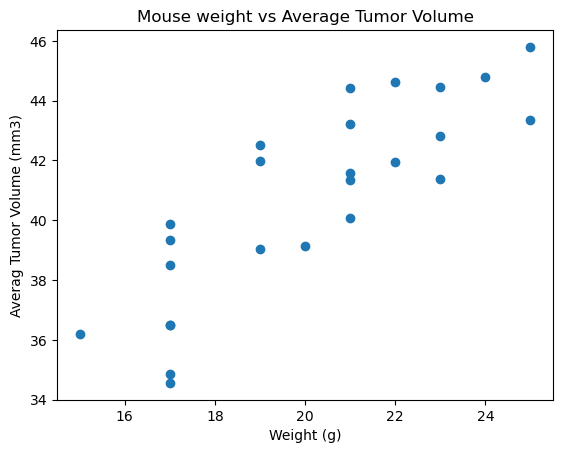

In [134]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_df = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)'])
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


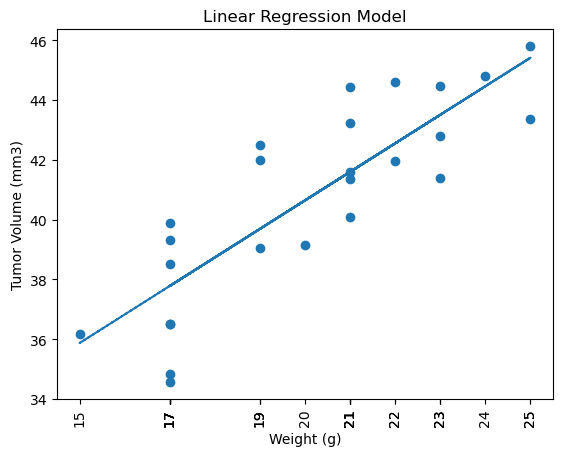

In [142]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#correlation_coefficient
correlation = (st.pearsonr(avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression
x_values = avg_df['Weight (g)']
y_values = avg_df['Tumor Volume (mm3)']

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_values, y_values)
pe_fit = pe_slope * x_values + pe_int

plt.scatter(x_values, y_values)
plt.plot(x_values,pe_fit,"--")
plt.xticks(x_values, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Linear Regression Model")
plt.show()